(-0.046434081388551866,
 1.2509937656367658,
 -1.0277737364382529,
 0.2855776563611639)

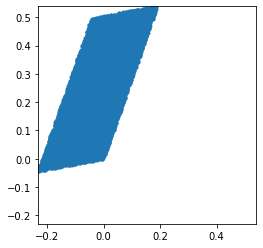

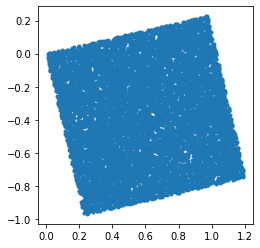

In [259]:
# Good example showing why whitening is a useful step for ICA
# You can experiment with various (non-gaussian) variables to see that 
#     once you apply whitening (i.e., the matrix V), all that's left to do is
#     find the rotation -- the data is sphered by V

import numpy as np
import matplotlib.pyplot as plt
N = 10000
#x1 = np.random.laplace(size=N).reshape(-1, 1)
#x2 = np.random.laplace(size=N).reshape(-1, 1)
#x1 = np.random.standard_cauchy(size=N).reshape(-1, 1)
#x2 = np.random.standard_cauchy(size=N).reshape(-1, 1)
#x1 = np.random.randn(N).reshape(-1,1)
#x2 = np.random.randn(N).reshape(-1,1)
x1 = np.random.rand(N).reshape(-1,1)
x2 = np.random.rand(N).reshape(-1,1)

x = np.concatenate((x1,x2),axis=1)

plt.figure()
#A = np.array([[2, 0], [6, 7]])
A = np.random.randn(2,2)
y = (A@x.T).T
#R = np.linalg.cholesky(A)
plt.plot(y[:,0], y[:,1], '.')
mn = y.min()
mx = y.max()
plt.xlim((mn,mx))
plt.ylim((mn,mx))

ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.draw()
#plt.axis('scaled')

Ca = A@A.T
(l, Q) = np.linalg.eig(Ca)
Dsqrt = np.diag(np.sqrt(l))
Dsqrtinv = np.linalg.inv(Dsqrt)

plt.figure()
V = Dsqrtinv @ Q.T
z = (V@y.T).T
plt.plot(z[:,0], z[:,1], '.')
plt.axis('scaled')